Purpose of this file: 

1. Create the district level files in a form that can be used in regression analysis and network visualization (long, transposed, non-cumulative percentages)
2. Produce some lollipop plots that can show the changes in mobility pre-post lockdown
3. Do some kind of PCA/factor analysis or shapley decomposition to illustrate the characteristics of districts that:

- (a) had greater movement pre-pandemic <br>
- (b) had least movement during the pandemic <br>
- (c) had the greatest drops in movement pre/post 


In [18]:
#global paths
data_viz_path="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/09_Visualization/data/preprocessed/"
dist_names="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/shapefiles/60_districts/ZWE_adm2.csv"
#paths
cumul_path="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/mobility/district_level/probabilities/"
noncumul_path="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/mobility/district_level/probabilities/"
plot_path = "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/mobility/district_level/plots/"
#original, cumulative OD matrices
pre_ld_mm= "daily_region_transition_probability-new-district-pre-lockdown_i5.csv"
post_ld_mm= "daily_region_transition_probability-new-district-post-lockdown_i5.csv"

#combined 
cumul_input_nld=cumul_path+pre_ld_mm
cumul_input_ld=cumul_path+post_ld_mm


#non cumulative output files
non_cum_pre_ld_mm= "noncumul_nld_weekly_movement_i5.csv"
non_cum_ld_mm = "noncumul_ld_weekly_movement_i5.csv"


#non cumulative path and file
noncumul_output_nld= noncumul_path+non_cum_pre_ld_mm
noncumul_output_ld= noncumul_path+non_cum_ld_mm

#non cumulative output files - daily 
daily_noncum_pre_ld_mm= "daily_noncumul_nld_movement_i5.csv"
daily_noncum_ld_mm = "daily_noncumul_ld_movement_i5.csv"

#daily non cumulative path and file
daily_noncumul_output_nld= noncumul_path+daily_noncum_pre_ld_mm
daily_noncumul_output_ld= noncumul_path+daily_noncum_ld_mm


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
# use Robbie's code to convert the lockdown cumulative into a non-cumulative matrix 

## here's the function:
def convert_cumulative_od_matrix_to_probabilities(data_path, save_path, average_week):
    """
    A function to convert the cumulative probability OD matrix to the probability of each someone in a given
    district visiting a given district
    :param data_path: Where you have the OD matrix saved
    :param save_path: Where you want to save the new matrix
    :param average_week: Boolean, if you want to keep the probabilities for each day or just average the week out
    :return:
    """
    data = pd.read_csv(data_path)
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    for idx in data.index:
        cumulative_values = list(data.iloc[idx][2:])
        displaced_cumulative_values = np.insert(np.delete(cumulative_values, -1), 0, 0)
        probabilities = cumulative_values - displaced_cumulative_values
        probabilities = probabilities / 100
        data.iloc[idx][2:] = probabilities
        for idx_2, val in enumerate(data.columns[2:]):
            data.loc[idx, val] = probabilities[idx_2]
    if average_week:
        data = data.groupby('home_region').mean()
        data = data.drop('weekday', axis=1)
        try:
            data = data.drop('weekday', axis=1)
        except KeyError:
            print("not found")
    data.to_csv(save_path)

## District level

### Weekly

In [21]:
#create the nld non-cum weekly version
convert_cumulative_od_matrix_to_probabilities(cumul_input_nld, noncumul_output_nld, True)
# now I have the non-cumulative matrices, convert these so they can be used in network diagrams 
## NLD
nld_df = pd.read_csv(noncumul_output_nld)
# Reset the index to be the first column name ('Category')
nld_df =nld_df.set_index('home_region')
nld_df.head()
## if True the function will convert the OD matrix to weekly averages, if False, it will keep as daily

<ipython-input-20-74d37b3d4440>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[idx][2:] = probabilities


not found


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
home_region,,,,,,,,,,,,,,,,,,,,,
d_1,0.860345,0.003574,0.000167,0.000016,0.000004,0.000021,0.000231,0.000001,0.0,0.000000,...,0.002922,0.015012,0.000280,0.000081,0.000277,0.005449,0.002235,0.000522,0.000316,0.001535
d_10,0.000010,0.048051,0.000000,0.000000,0.000000,0.000282,0.000166,0.000005,0.0,0.611304,...,0.000000,0.000000,0.000164,0.000000,0.000000,0.000159,0.000291,0.000000,0.000000,0.000000
d_11,0.000000,0.015447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.003875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d_12,0.000000,0.013891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d_13,0.000024,0.154645,0.000005,0.000000,0.000000,0.000511,0.000326,0.000111,0.0,0.077784,...,0.000000,0.000000,0.000287,0.000000,0.000000,0.000297,0.000411,0.000000,0.000000,0.000000


### non-lockdown first 

In [22]:
# Transpose/pivot
#interchage the ld and nld as I'm creating this 
df=nld_df

df_t = df.stack().reset_index()
df_t.columns = ['source', 'target', 'weight']
# Split d_ so i have numbers
# Convert elements to strings
df_t['source'] = df_t['source'].astype(str)

df_t['dist_no'] = df_t['source'].str.split('d_')

# Extract the elements after 'd_'
df_t['dist_no'] = df_t['dist_no'].str[1]
df_t['dist_no'] = df_t['dist_no'].astype(int)

df_t.head()

# note I used this https://medium.com/gitconnected/5-extremely-useful-plots-for-data-scientists-that-you-never-knew-existed-5b92498a878f

,source,target,weight,dist_no
0,d_1,d_1,0.860345,1
1,d_1,d_2,0.003574,1
2,d_1,d_3,0.000167,1
3,d_1,d_4,0.000016,1
4,d_1,d_5,0.000004,1


In [23]:
#clean it up a bit for export 
prob_move = df_t
prob_move.rename(columns={'weight':'nld_prob_move'}, inplace=True)
#prob_move.drop(columns=[ 'ward_no'], inplace=True)
prob_move=prob_move.round(3)

#save output 
prob_move.to_csv(noncumul_path+"d_prob_move_pairs_nld.csv", index=False)
prob_move.head()

,source,target,nld_prob_move,dist_no
0,d_1,d_1,0.860,1
1,d_1,d_2,0.004,1
2,d_1,d_3,0.000,1
3,d_1,d_4,0.000,1
4,d_1,d_5,0.000,1


In [24]:
#keeping just a version with the probability of staying in each ward
prob_stay=prob_move
# prob_stay['source'] = prob_stay['source'].str.replace('^w_0000', '', regex=True)
# prob_stay['target'] = prob_stay['target'].str.replace('^wp_', '', regex=True)
prob_stay =prob_move[prob_move['source']==prob_move['target']]
prob_stay.rename(columns={'nld_prob_move':'nld_prob_stay'}, inplace=True)
prob_stay['nld_prob_leave']= 1- prob_stay['nld_prob_stay'].round(3)
#prob_stay=prob_stay.drop(columns=['dist_no'])

prob_stay.to_csv(noncumul_path+"d_prob_stay_leave_nld.csv", index=False)
prob_stay.head()

<ipython-input-24-5b25b8a95830>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_stay.rename(columns={'nld_prob_move':'nld_prob_stay'}, inplace=True)
<ipython-input-24-5b25b8a95830>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_stay['nld_prob_leave']= 1- prob_stay['nld_prob_stay'].round(3)


,source,target,nld_prob_stay,dist_no,nld_prob_leave
0,d_1,d_1,0.860,1,0.140
69,d_10,d_10,0.611,10,0.389
130,d_11,d_11,0.570,11,0.430
191,d_12,d_12,0.820,12,0.180
252,d_13,d_13,0.568,13,0.432


In [25]:
# import names as labels for gephy

dist_names_df = pd.read_csv(dist_names)

dist_names_df = dist_names_df[['ID_2', 'NAME_2', 'COMB']]

# dist_names['ID_2']= dist_names['ID_2'].astype(int)
# retain the names and numbers only
dist_names_df.head()

,ID_2,NAME_2,COMB
0,1,Bulawayo,1-Bulawayo
1,2,Harare,2-Harare
2,3,Buhera,3-Buhera
3,4,Chimanimani,4-Chimanimani
4,5,Chipinge,5-Chipinge


In [26]:
prob_stay.head()

,source,target,nld_prob_stay,dist_no,nld_prob_leave
0,d_1,d_1,0.860,1,0.140
69,d_10,d_10,0.611,10,0.389
130,d_11,d_11,0.570,11,0.430
191,d_12,d_12,0.820,12,0.180
252,d_13,d_13,0.568,13,0.432


In [27]:
#merge with each of the dataframes and export 
# Merge DataFrames on the common column
nld_mm = pd.merge(dist_names_df, prob_stay, left_on='ID_2', right_on='dist_no', how='left')
# rename the label
nld_mm.rename(columns={'NAME_2': 'label'}, inplace=True)

#nld_mm=nld_mm[['label', 'source', 'target', 'nld_prob_stay', 'nld_prob_move']]
#export the csv
nld_mm.to_csv(noncumul_path+"nld_mm_names.csv",index=False)


nld_mm.head()

,ID_2,label,COMB,source,target,nld_prob_stay,dist_no,nld_prob_leave
0,1,Bulawayo,1-Bulawayo,d_1,d_1,0.860,1,0.140
1,2,Harare,2-Harare,d_2,d_2,0.735,2,0.265
2,3,Buhera,3-Buhera,d_3,d_3,0.648,3,0.352
3,4,Chimanimani,4-Chimanimani,d_4,d_4,0.647,4,0.353
4,5,Chipinge,5-Chipinge,d_5,d_5,0.883,5,0.117


### lockdown file

In [28]:

#create the ld non-cum weekly version
convert_cumulative_od_matrix_to_probabilities(cumul_input_ld, noncumul_output_ld, True)

# convert it 
ld_df = pd.read_csv(noncumul_output_ld)
# Reset the index to be the first column name ('Category')
ld_df = ld_df.set_index('home_region')
ld_df.head()

<ipython-input-20-74d37b3d4440>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[idx][2:] = probabilities


not found


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
home_region,,,,,,,,,,,,,,,,,,,,,
d_1,0.917507,0.000495,0.000011,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.001339,0.006708,0.000097,0.0,0.000007,0.001227,0.000481,0.000132,0.000047,0.000298
d_10,0.000000,0.008948,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.696122,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000
d_11,0.000000,0.002712,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.002773,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d_12,0.000000,0.001939,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000170,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d_13,0.000000,0.076661,0.000000,0.0,0.0,0.000059,0.000007,0.0,0.0,0.065729,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000025,0.000044,0.000000,0.000000,0.000000


In [29]:
# Transpose/pivot
#interchange the ld and ld as I'm creating this 
df=ld_df

ld_df_t = df.stack().reset_index()
ld_df_t.columns = ['source', 'target', 'weight']
ld_df_t.rename(columns={'weight':'ld_prob_move'}, inplace=True)
# Split d_ so i have numbers
# Convert elements to strings
ld_df_t['source'] = ld_df_t['source'].astype(str)

ld_df_t['dist_no'] = ld_df_t['source'].str.split('d_')

# Extract the elements after 'd_'
ld_df_t['dist_no'] = ld_df_t['dist_no'].str[1]
ld_df_t['dist_no'] = ld_df_t['dist_no'].astype(int)

ld_df_t.head()


,source,target,ld_prob_move,dist_no
0,d_1,d_1,0.917507,1
1,d_1,d_2,0.000495,1
2,d_1,d_3,0.000011,1
3,d_1,d_4,0.000000,1
4,d_1,d_5,0.000000,1


In [30]:
#clean it up a bit for export 
ld_prob_move = ld_df_t
ld_prob_move=ld_prob_move.round(3)

#save output 
ld_prob_move.to_csv(noncumul_path+"d_prob_move_pairs_ld.csv", index=False)
ld_prob_move.head()

,source,target,ld_prob_move,dist_no
0,d_1,d_1,0.918,1
1,d_1,d_2,0.000,1
2,d_1,d_3,0.000,1
3,d_1,d_4,0.000,1
4,d_1,d_5,0.000,1


In [31]:
#keeping just a version with the probability of staying in each ward
ld_prob_stay=ld_prob_move
ld_prob_stay =ld_prob_move[ld_prob_move['source']==ld_prob_move['target']]
ld_prob_stay.rename(columns={'ld_prob_move':'ld_prob_stay'}, inplace=True)
ld_prob_stay['ld_prob_leave']= 1- ld_prob_stay['ld_prob_stay']

ld_prob_stay.to_csv(noncumul_path+"d_prob_stay_leave_ld.csv", index=False)
ld_prob_stay.head()

<ipython-input-31-91bfb20ab6a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld_prob_stay.rename(columns={'ld_prob_move':'ld_prob_stay'}, inplace=True)
<ipython-input-31-91bfb20ab6a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld_prob_stay['ld_prob_leave']= 1- ld_prob_stay['ld_prob_stay']


,source,target,ld_prob_stay,dist_no,ld_prob_leave
0,d_1,d_1,0.918,1,0.082
69,d_10,d_10,0.696,10,0.304
130,d_11,d_11,0.606,11,0.394
191,d_12,d_12,0.847,12,0.153
252,d_13,d_13,0.689,13,0.311


In [32]:
# combined Df for sankey or lolipops

comb_prob_stay = pd.merge(nld_mm, ld_prob_stay, on='dist_no')


comb_prob_stay=comb_prob_stay.drop(['source_y', 'target_y', 'ID_2'], axis=1)
comb_prob_stay.to_csv(noncumul_path+"d_comb_prob_stay.csv",index=False)
comb_prob_stay.head()

,label,COMB,source_x,target_x,nld_prob_stay,dist_no,nld_prob_leave,ld_prob_stay,ld_prob_leave
0,Bulawayo,1-Bulawayo,d_1,d_1,0.860,1,0.140,0.918,0.082
1,Harare,2-Harare,d_2,d_2,0.735,2,0.265,0.803,0.197
2,Buhera,3-Buhera,d_3,d_3,0.648,3,0.352,0.702,0.298
3,Chimanimani,4-Chimanimani,d_4,d_4,0.647,4,0.353,0.691,0.309
4,Chipinge,5-Chipinge,d_5,d_5,0.883,5,0.117,0.909,0.091


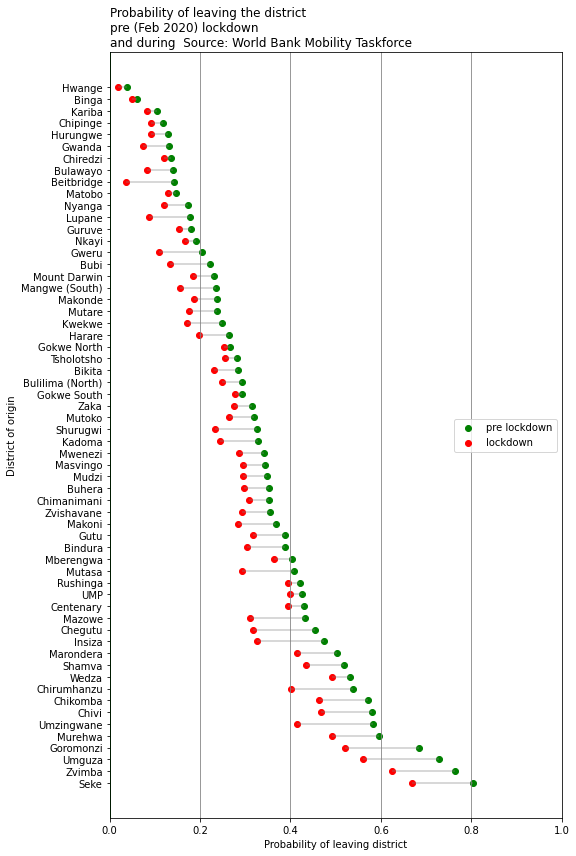

In [33]:
# let's make a lolipop plot out of this with prob leave (so that it's clear the probabilities are dropping )

# Reorder it following the values of the first value:
ordered_df = comb_prob_stay.sort_values(by='nld_prob_leave')

my_range=range(1,len(comb_prob_stay['nld_prob_leave'].index)+1)
fig, ax = plt.subplots (figsize = (8, 12))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=list(ordered_df['ld_prob_leave']), xmax=list(ordered_df['nld_prob_leave']), color='grey', alpha=0.4)
plt.scatter(ordered_df['nld_prob_leave'], my_range, color='green', alpha=1, label='pre lockdown')
plt.scatter(ordered_df['ld_prob_leave'], my_range, color='red', alpha=1 , label='lockdown')

plt.legend(loc='center right')
 
# Add title and axis names
plt.yticks(my_range, ordered_df['label'], fontsize=10, weight=14, color='black')
plt.title("Probability of leaving the district \npre (Feb 2020) lockdown \nand during  Source: World Bank Mobility Taskforce", loc='left')
plt.xlabel('Probability of leaving district')
plt.ylabel('District of origin')
ax.set_facecolor('white')
plt.grid(color='grey', axis="x")
plt.axvline(0, color="green", linewidth=1) # adding black line

#invert axis 
plt.gca().invert_yaxis()

# use adjust text function 
plt.tight_layout()
#limit range on axis
plt.xlim([0, 1])

# Show the graph
plt.savefig(plot_path+'prob_leave_nld_ld_lolipop_robbie_recreated.png', dpi=300, facecolor = 'white')

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 44 to 38
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       60 non-null     object 
 1   dist_no     60 non-null     int64  
 2   diff_leave  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


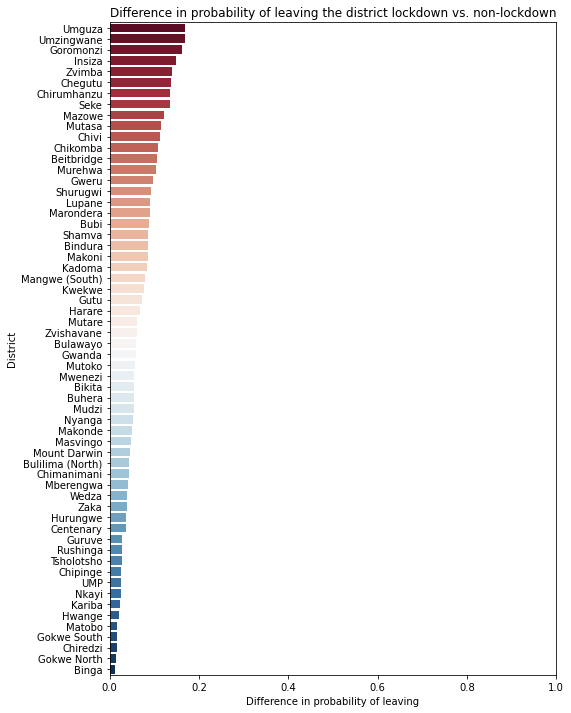

In [34]:
# Let's do another one with just the difference between nld and lockdown, ranking by the difference then can place side by side 

comb_prob_stay['diff_leave']=comb_prob_stay['nld_prob_leave']-comb_prob_stay['ld_prob_leave']
comb_prob_stay.head()
bar_data = comb_prob_stay[['label', 'dist_no', 'diff_leave']]
bar_data = bar_data.sort_values(by='diff_leave', ascending=False)
bar_data.info()
plt.figure(figsize=(8,12))
plt.tight_layout()
# Normalize the ranks to create a gradient effect
norm = np.linspace(0, 1, len(bar_data))
# Create a color gradient from red to blue
colors = sns.color_palette("RdBu", as_cmap=True)(norm)
sns.barplot(data=bar_data, x="diff_leave", y="label", palette=colors)
plt.ylabel("District")
plt.xlabel("Difference in probability of leaving")
plt.xlim(0, 1)
plt.title('Difference in probability of leaving the district lockdown vs. non-lockdown', fontsize=12 )
# export
plt.savefig(plot_path+'diff_dist_prob_leave.png', dpi=300, facecolor="white")



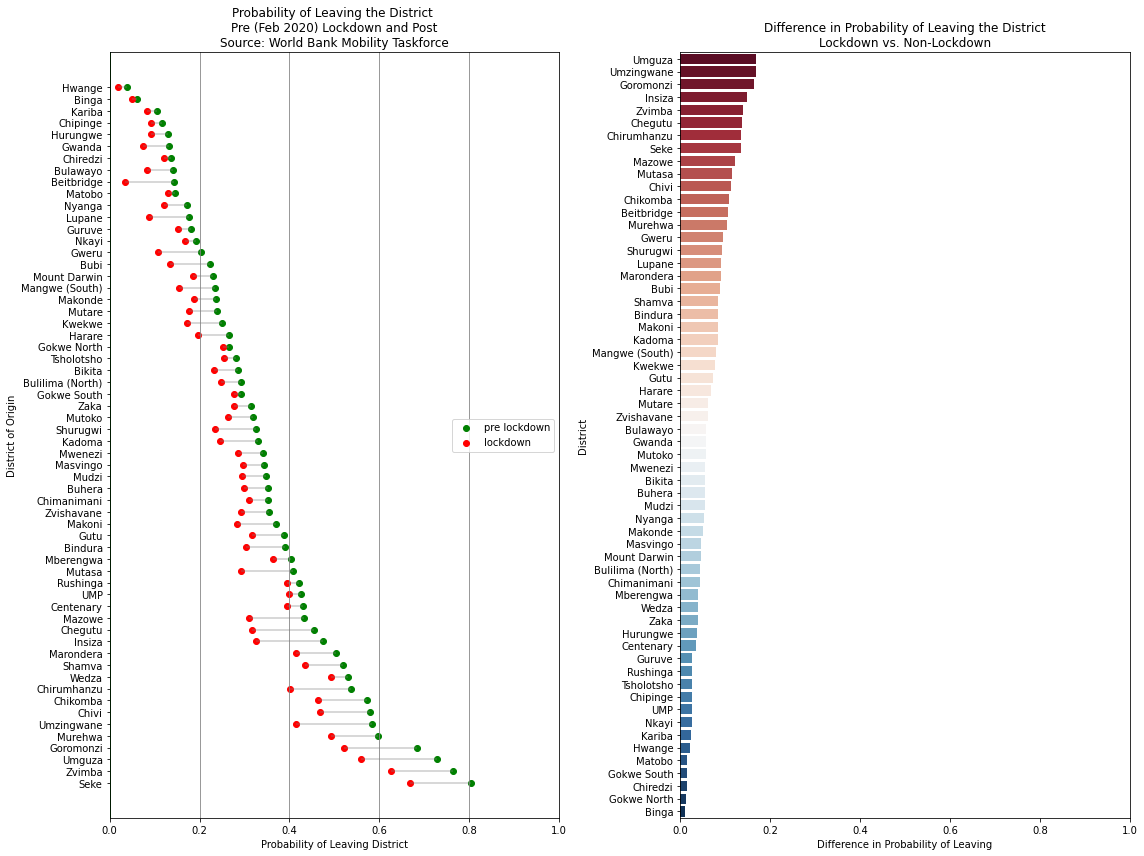

In [35]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Left subplot - Horizontal plot
axes[0].hlines(y=my_range, xmin=list(ordered_df['ld_prob_leave']), 
               xmax=list(ordered_df['nld_prob_leave']), color='grey', alpha=0.4)

# Scatter plots on the left subplot
axes[0].scatter(ordered_df['nld_prob_leave'], my_range, color='green', alpha=1, label='pre lockdown')
axes[0].scatter(ordered_df['ld_prob_leave'], my_range, color='red', alpha=1, label='lockdown')

# Configure left subplot
axes[0].legend(loc='center right')
axes[0].set_yticks(my_range)
axes[0].set_yticklabels(ordered_df['label'], fontsize=10,  color='black')
axes[0].set_title("Probability of Leaving the District \nPre (Feb 2020) Lockdown and Post\nSource: World Bank Mobility Taskforce", loc='center', fontsize=12)
axes[0].set_xlabel('Probability of Leaving District')
axes[0].set_ylabel('District of Origin')
axes[0].set_facecolor('white')
axes[0].grid(color='grey', axis="x")
axes[0].axvline(0, color="green", linewidth=1)  # Adding vertical line
axes[0].invert_yaxis()  # Invert Y-axis
axes[0].set_xlim([0, 1])  # Limit X-axis range

# Right subplot - Bar plot
comb_prob_stay['diff_leave'] = comb_prob_stay['nld_prob_leave'] - comb_prob_stay['ld_prob_leave']
bar_data = comb_prob_stay[['label', 'dist_no', 'diff_leave']].sort_values(by='diff_leave', ascending=False)

# Normalize the ranks to create a gradient effect
norm = np.linspace(0, 1, len(bar_data))
# Create a color gradient from red to blue
colors = sns.color_palette("RdBu", as_cmap=True)(norm)

# Create bar plot on the right subplot
sns.barplot(data=bar_data, x="diff_leave", y="label", palette=colors, ax=axes[1])
axes[1].set_ylabel("District")
axes[1].set_xlabel("Difference in Probability of Leaving")
axes[1].set_xlim(0, 1)
axes[1].set_title('Difference in Probability of Leaving the District\nLockdown vs. Non-Lockdown', fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig(plot_path + 'combined_plots.png', dpi=500, facecolor='white')
plt.show()

In [36]:
# do a transposed version for a sankey plot of the equivalent 

# Transpose/pivot
# so now for each district you have the prob stay value nld and ld so they can move between them  
df=comb_prob_stay[['source_x', 'nld_prob_leave', 'ld_prob_leave']]
df.head()

,source_x,nld_prob_leave,ld_prob_leave
0,d_1,0.140,0.082
1,d_2,0.265,0.197
2,d_3,0.352,0.298
3,d_4,0.353,0.309
4,d_5,0.117,0.091


In [37]:
# melt it from wide to long 
df_long=pd.melt(df, id_vars='source_x', var_name ='prob_leave', value_name='value')
df_long.rename(columns={'source_x': 'source'}, inplace=True)
df_long['target']=df_long['source']+df_long['prob_leave'] 
#df_long.rename(columns={'prob_leave': 'target'}, inplace=True)
df_long=df_long.sort_values(by='source')



df_long.head()

,source,prob_leave,value,target
0,d_1,nld_prob_leave,0.140,d_1nld_prob_leave
60,d_1,ld_prob_leave,0.082,d_1ld_prob_leave
69,d_10,ld_prob_leave,0.304,d_10ld_prob_leave
9,d_10,nld_prob_leave,0.389,d_10nld_prob_leave
70,d_11,ld_prob_leave,0.394,d_11ld_prob_leave


In [ ]:
import plotly.graph_objects as go

# Creating the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=df_long['source'].tolist() + df_long['target'].tolist(),  # Concatenate source and target labels
        color="blue"
    ),
    link=dict(
        source=df_long['source'].apply(lambda x: df_long['source'].tolist().index(x)).tolist(),  # Convert source labels to indices
        target=df_long['target'].apply(lambda x: df_long['target'].tolist().index(x) + len(df_long['source'])).tolist(),  # Convert target labels to indices
        value=df_long['value'].tolist()
    )
)])
# fig, ax = plt.subplots (figsize = (8, 12))
fig.update_layout(title_text="Sankey Diagram with DataFrame", font_size=10, height=1000)
fig.show()
